{'a': 4392, 'b': 711, 'c': 1047, 'd': 2427, 'e': 5313, 'f': 434, 'g': 3624, 'h': 4320, 'i': 7453, 'j': 1734, 'k': 167, 'l': 813, 'm': 629, 'n': 5777, 'o': 2736, 'p': 135, 'q': 441, 'r': 423, 's': 1565, 't': 631, 'u': 3671, 'v': 27, 'w': 448, 'x': 805, 'y': 1503, 'z': 2249}


Text(64.72222222222221, 0.5, '')

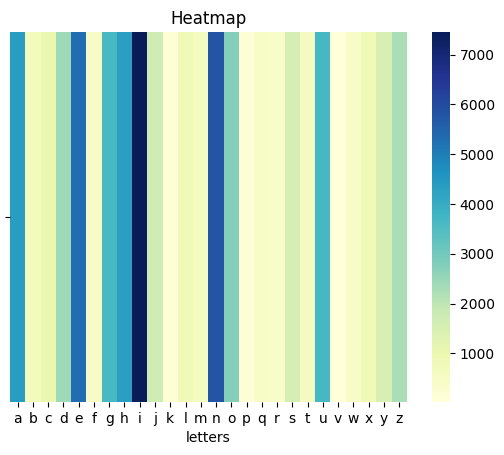

In [2]:
import fitz   #PyMuPDF
from xpinyin import Pinyin  #xpinyin
import json

file_path = "C:/Users/10094/Desktop/高效均匀的打字编码方法/共产党宣言.pdf"
doc = fitz.open(file_path)
p = Pinyin() 
resultDict={}
for i in range(97,123):
    resultDict[chr(i)]=0 #初始化字母字典
for page in doc:
    text = page.get_text("text")   #提取带换行符的纯文本
    pinyintext = p.get_pinyin(text,'')  #汉字转换为拼音
    for c in pinyintext:
        if c>='a' and c<='z':
            resultDict[c]+=1
with open("C:/Users/10094/Desktop/高效均匀的打字编码方法/dict.json", "w", encoding='utf-8') as f:
    json.dump(resultDict,f, indent=2, sort_keys=True)   #保存结果
print(resultDict)

#绘制热力图
import numpy as np
import seaborn as sns
a=[]
for i in range(97,123):
    a.append(resultDict[chr(i)])
array = np.asarray(a)
x_ticks = []
for i in range(97,123):
    x_ticks.append(chr(i))
y_ticks = ['']  # 自定义横纵轴
ax = sns.heatmap([array], xticklabels=x_ticks, yticklabels=y_ticks,cmap="YlGnBu")
ax.set_title('Heatmap')  # 图标题
ax.set_xlabel('letters')  # x轴标题
ax.set_ylabel('')

In [3]:
import json
import numpy as np
from sklearn import preprocessing  #scikit-learn
import fitz   #PyMuPDF
from xpinyin import Pinyin  #xpinyin

with open('C:/Users/10094/Desktop/高效均匀的打字编码方法/dict.json', 'r') as fp:
    letterDict = json.load(fp)  #读取字母使用次数
keys=['a','s','d','f','j','k','l']  #一般情况下手指放置的按键
otherKeys=['q','w','e','r','t','y','u','i','o','p','g','h','z','x','c','v','b','n','m']
list1=[]
list2=[]
for c in keys:
    list1.append(letterDict[c])
for c in otherKeys:
    list2.append(letterDict[c])  #将按键频率分为两个维度进行计算
#计算按键使用均衡性
array1=np.asarray(list1).reshape(-1,1)
array2=np.asarray(list2).reshape(-1,1)
min_max_scaler = preprocessing.MinMaxScaler()
array1_minMax = min_max_scaler.fit_transform(array1)
array2_minMax = min_max_scaler.fit_transform(array2)
s=np.std(array1_minMax)+np.std(array2_minMax) #两个维度的标准差之和作为均衡性的标准
print("按键使用均衡性即标准差为：",s)

#计算输入效率
typeNum=0 #按键次数
characterNum=0 #汉字字数
typeTime=0 #打字时间
timeDict={} #字母耗时字典
for c in keys:
    timeDict[c]=0.5 #手指位置的按键更容易点击
for c in otherKeys:
    timeDict[c]=0.8 
file_path = "C:/Users/10094/Desktop/高效均匀的打字编码方法/共产党宣言.pdf"
doc = fitz.open(file_path)
p = Pinyin() 
for page in doc:
    text = page.get_text("text")
    for c in text:
        if '\u4e00' <= c <= '\u9fff':
            characterNum+=1
    pinyintext = p.get_pinyin(text,'')
    for c in pinyintext:
        if 'a'<= c <='z':
            typeNum+=1
            typeTime+=timeDict[c]
print("总按键次数为：",typeNum)
print("汉字总数为：",characterNum)
print("平均单字按键数：",typeNum/characterNum)
print("平均单字耗时：",typeTime/characterNum)

按键使用均衡性即标准差为： 0.6067274308999717
总按键次数为： 53475
汉字总数为： 18118
平均单字按键数： 2.9514847113367924
平均单字耗时： 2.1702395407882955


按键使用均衡性即标准差为： 0.5362535453790119
总按键次数为： 29620
汉字总数为： 18118
平均单字按键数： 1.6348382823711227
平均单字耗时： 1.218258085881444


Text(64.72222222222221, 0.5, '')

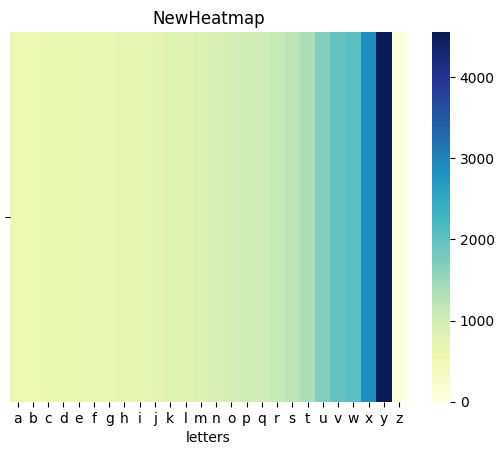

In [4]:
import fitz   #PyMuPDF
from xpinyin import Pinyin  #xpinyin
import numpy as np
import seaborn as sns
from sklearn import preprocessing  #scikit-learn
import operator
import json

file_path = "C:/Users/10094/Desktop/高效均匀的打字编码方法/共产党宣言.pdf"
doc = fitz.open(file_path)
p = Pinyin()
spellDict={} #存储各读音出现的次数
for page in doc:
    text = page.get_text("text")
    for c in text:
        if '\u4e00' <= c <= '\u9fff':
            ch=p.get_pinyin(c,'')
            if ch in spellDict:
                spellDict[ch]+=1
            else :
                spellDict[ch]=1
sortedSpellDict=dict(sorted(spellDict.items(), key=operator.itemgetter(1)))
#重新编码
class Node:
    def __init__(self,key,freq):
        self.key = key #节点的名字
        self.freq = freq
        self.child = {} #节点孩子
        self.code = ''
def create_nodeQ(p_dict):
    Q=[]
    for i in p_dict.keys():
        Q.append(Node(i,p_dict[i]))  
    Q.sort(key=lambda item:item.freq,reverse = True)  #用lambda隐函数实现队列按照字母的概率降序排列      
    return Q 
def addQ(Q, nodeNew):
  if len(Q) == 0:
    return [nodeNew]
  else:
      Q=Q+[nodeNew]
      Q.sort(key=lambda item:item.freq,reverse=True)
      #每次加入节点都需要重新排列成降序
  return Q
class Nodequeue:
    def __init__(self,p_dict):
        self.que = create_nodeQ(p_dict)
        self.size = len(self.que)
        
    def addnode(self,node):
        self.que = addQ(self.que, node)
        self.size += 1
       
    def popNode(self):
        self.size -= 1
        return self.que.pop()
    #加入队列长度要+1，弹出长度-1
def creatHuffmanTree(nodeQ,exact_division):
  if exact_division == True:
      w=0
      for i in range(1,24):
         locals()['node_'+str(i)]=nodeQ.popNode()
         w+=locals()['node_'+str(i)].freq
      r = Node(None,w)
      for i in range(1,24):
        r.child[i] = locals()['node_'+str(i)]
      nodeQ.addnode(r)
  while nodeQ.size != 1:
    w=0
    for i in range(1,26):
       locals()['node_'+str(i)]=nodeQ.popNode()
       w+=locals()['node_'+str(i)].freq
    r = Node(None, w)
    for i in range(1,26):
       r.child[i]=locals()['node_'+str(i)]
    nodeQ.addnode(r)
  return nodeQ.popNode()
  #最后返回的是队列的最后一个节点，也就是概率最大的点，就是这个huffman树的根节点

#由树得到编码表
codeDic1 = {}#编码字典
# 由哈夫曼树得到哈夫曼编码表
def HuffmanCodeDic(roof, x):
  global codeDic, codeList
  if roof:#只要根不为空
    for i in range(1,26):
       if i in roof.child:
          HuffmanCodeDic(roof.child[i],x+chr(96+i))
    roof.code += x
    if roof.key:
      codeDic1[roof.key] = roof.code

# 字符串编码
def TransEncode(string):
  global codeDic1
  transcode = ""
  for i in string:
    transcode += codeDic1[i]
  return transcode
exact_division=True
t = Nodequeue(sortedSpellDict)
tree = creatHuffmanTree(t,exact_division)
HuffmanCodeDic(tree, '') #从哈夫曼树获取编码
with open("C:/Users/10094/Desktop/高效均匀的打字编码方法/codeDict.json", "w", encoding='utf-8') as f:
    json.dump(codeDic1,f, indent=2, sort_keys=True)   #保存结果
#用新的编码得到新的拼音字典
newSpellDict={}
#计算新的编码的数据评价
for c in spellDict:
   newSpellDict[codeDic1[c]]=spellDict[c]
newLetterDict={} #获得新的字母使用情况
for i in range(97,123):
    newLetterDict[chr(i)]=0
for ch in newSpellDict:
   for c in ch:
      newLetterDict[c]+=newSpellDict[ch]
keys=['a','s','d','f','j','k','l']  #一般情况下手指放置的按键
otherKeys=['q','w','e','r','t','y','u','i','o','p','g','h','z','x','c','v','b','n','m']
list1=[]
list2=[]
for c in keys:
    list1.append(newLetterDict[c])
for c in otherKeys:
    list2.append(newLetterDict[c])  #将按键频率分为两个维度进行计算
#计算按键使用均衡性
array1=np.asarray(list1).reshape(-1,1)
array2=np.asarray(list2).reshape(-1,1)
min_max_scaler = preprocessing.MinMaxScaler()
array1_minMax = min_max_scaler.fit_transform(array1)
array2_minMax = min_max_scaler.fit_transform(array2)
s=np.std(array1_minMax)+np.std(array2_minMax) #两个维度的标准差之和作为均衡性的标准
print("按键使用均衡性即标准差为：",s)
typeNum=0 #按键次数
for c in newLetterDict:
   typeNum+=newLetterDict[c]
characterNum=0 #汉字字数
for ch in spellDict:
   characterNum+=spellDict[ch]
typeTime=0 #打字时间
timeDict={} #字母耗时字典
for c in keys:
    timeDict[c]=0.5 #手指位置的按键更容易点击
for c in otherKeys:
    timeDict[c]=0.8 
for c in newLetterDict:
   typeTime+=timeDict[c]*newLetterDict[c]
print("总按键次数为：",typeNum)
print("汉字总数为：",characterNum)
print("平均单字按键数：",typeNum/characterNum)
print("平均单字耗时：",typeTime/characterNum)
#绘制热力图
a=[]
for i in range(97,123):
    a.append(newLetterDict[chr(i)])
array = np.asarray(a)
x_ticks = []
for i in range(97,123):
    x_ticks.append(chr(i))
y_ticks = ['']  # 自定义横纵轴
ax = sns.heatmap([array], xticklabels=x_ticks, yticklabels=y_ticks,cmap="YlGnBu")
ax.set_title('NewHeatmap')  # 图标题
ax.set_xlabel('letters')  # x轴标题
ax.set_ylabel('')

按键使用均衡性即标准差为： 0.5135872174912091
总按键次数为： 30264
汉字总数为： 18118
平均单字按键数： 1.6703830444861463
平均单字耗时： 1.096942267358428


Text(64.72222222222221, 0.5, '')

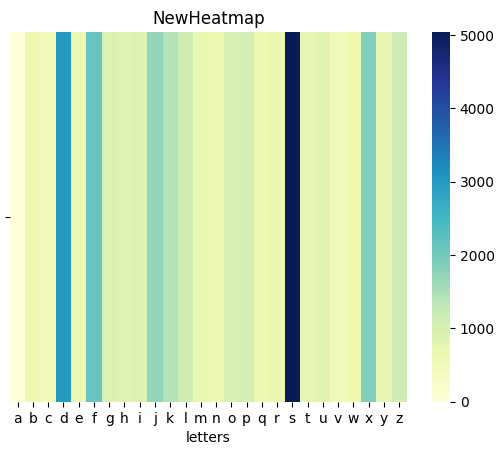

In [5]:
import fitz   #PyMuPDF
from xpinyin import Pinyin  #xpinyin
import numpy as np
import seaborn as sns
from sklearn import preprocessing  #scikit-learn
import operator
import json

file_path = "C:/Users/10094/Desktop/高效均匀的打字编码方法/共产党宣言.pdf"
doc = fitz.open(file_path)
p = Pinyin()
spellDict={} #存储各读音出现的次数
for page in doc:
    text = page.get_text("text")
    for c in text:
        if '\u4e00' <= c <= '\u9fff':
            ch=p.get_pinyin(c,'')
            if ch in spellDict:
                spellDict[ch]+=1
            else :
                spellDict[ch]=1
sortedSpellDict=dict(sorted(spellDict.items(), key=operator.itemgetter(1)))
#重新编码
class Node:
    def __init__(self,key,freq):
        self.key = key #节点的名字
        self.freq = freq
        self.child = {} #节点孩子
        self.code = ''
def create_nodeQ(p_dict):
    Q=[]
    for i in p_dict.keys():
        Q.append(Node(i,p_dict[i]))  
    Q.sort(key=lambda item:item.freq,reverse = True)  #用lambda隐函数实现队列按照字母的概率降序排列      
    return Q 
def addQ(Q, nodeNew):
  if len(Q) == 0:
    return [nodeNew]
  else:
      Q=[nodeNew]+Q
      #Q.sort(key=lambda item:item.freq,reverse=True)
      #加入结点时不再排序，使叶子结点更均匀地分布在编码树的各分支
  return Q
class Nodequeue:
    def __init__(self,p_dict):
        self.que = create_nodeQ(p_dict)
        self.size = len(self.que)
        
    def addnode(self,node):
        self.que = addQ(self.que, node)
        self.size += 1
       
    def popNode(self):
        self.size -= 1
        return self.que.pop()
    #加入队列长度要+1，弹出长度-1
def creatHuffmanTree(nodeQ,exact_division):
  if exact_division == True:
      w=0
      for i in range(1,24):
         locals()['node_'+str(i)]=nodeQ.popNode()
         w+=locals()['node_'+str(i)].freq
      r = Node(None,w)
      for i in range(1,24):
        r.child[i] = locals()['node_'+str(i)]
      nodeQ.addnode(r)
  while nodeQ.size != 1:
    w=0
    for i in range(1,26):
       locals()['node_'+str(i)]=nodeQ.popNode()
       w+=locals()['node_'+str(i)].freq
    r = Node(None, w)
    for i in range(1,26):
       r.child[i]=locals()['node_'+str(i)]
    nodeQ.addnode(r)
  return nodeQ.popNode()
  #最后返回的是队列的最后一个节点，也就是概率最大的点，就是这个huffman树的根节点

#由树得到编码表
codeDic1 = {}#编码字典
letterList=['q','w','e','r','t','y','u','i','o','p','z','x','c','v','b','n','m','h','g','l','k','j','f','d','s','a'] #常用按键放在结点集中的位置
# 由哈夫曼树得到哈夫曼编码表
def HuffmanCodeDic(roof, x):
  global codeDic, codeList
  if roof:#只要根不为空
    for i in range(1,26):
       if i in roof.child:
          HuffmanCodeDic(roof.child[i],x+letterList[i-1])
    roof.code += x
    if roof.key:
      codeDic1[roof.key] = roof.code

# 字符串编码
def TransEncode(string):
  global codeDic1
  transcode = ""
  for i in string:
    transcode += codeDic1[i]
  return transcode
exact_division=True
t = Nodequeue(sortedSpellDict)
tree = creatHuffmanTree(t,exact_division)
HuffmanCodeDic(tree, '') #从哈夫曼树获取编码
with open("C:/Users/10094/Desktop/高效均匀的打字编码方法/balancedCodeDict.json", "w", encoding='utf-8') as f:
    json.dump(codeDic1,f, indent=2, sort_keys=True)   #保存结果
#用新的编码得到新的拼音字典
newSpellDict={}
#计算新的编码的数据评价
for c in spellDict:
   newSpellDict[codeDic1[c]]=spellDict[c]
newLetterDict={} #获得新的字母使用情况
for i in range(97,123):
    newLetterDict[chr(i)]=0
for ch in newSpellDict:
   for c in ch:
      newLetterDict[c]+=newSpellDict[ch]
keys=['a','s','d','f','j','k','l']  #一般情况下手指放置的按键
otherKeys=['q','w','e','r','t','y','u','i','o','p','g','h','z','x','c','v','b','n','m']
list1=[]
list2=[]
for c in keys:
    list1.append(newLetterDict[c])
for c in otherKeys:
    list2.append(newLetterDict[c])  #将按键频率分为两个维度进行计算
#计算按键使用均衡性
array1=np.asarray(list1).reshape(-1,1)
array2=np.asarray(list2).reshape(-1,1)
min_max_scaler = preprocessing.MinMaxScaler()
array1_minMax = min_max_scaler.fit_transform(array1)
array2_minMax = min_max_scaler.fit_transform(array2)
s=np.std(array1_minMax)+np.std(array2_minMax) #两个维度的标准差之和作为均衡性的标准
print("按键使用均衡性即标准差为：",s)
typeNum=0 #按键次数
for c in newLetterDict:
   typeNum+=newLetterDict[c]
characterNum=0 #汉字字数
for ch in spellDict:
   characterNum+=spellDict[ch]
typeTime=0 #打字时间
timeDict={} #字母耗时字典
for c in keys:
    timeDict[c]=0.5 #手指位置的按键更容易点击
for c in otherKeys:
    timeDict[c]=0.8 
for c in newLetterDict:
   typeTime+=timeDict[c]*newLetterDict[c]
print("总按键次数为：",typeNum)
print("汉字总数为：",characterNum)
print("平均单字按键数：",typeNum/characterNum)
print("平均单字耗时：",typeTime/characterNum)
#绘制热力图
a=[]
for i in range(97,123):
    a.append(newLetterDict[chr(i)])
array = np.asarray(a)
x_ticks = []
for i in range(97,123):
    x_ticks.append(chr(i))
y_ticks = ['']  # 自定义横纵轴
ax = sns.heatmap([array], xticklabels=x_ticks, yticklabels=y_ticks,cmap="YlGnBu")
ax.set_title('NewHeatmap')  # 图标题
ax.set_xlabel('letters')  # x轴标题
ax.set_ylabel('')

{'a': 0, 'b': 1313, 'c': 1166, 'd': 726, 'e': 696, 'f': 0, 'g': 2015, 'h': 2202, 'i': 856, 'j': 2987, 'k': 4665, 'l': 0, 'm': 1758, 'n': 1508, 'o': 944, 'p': 965, 'q': 658, 'r': 717, 's': 719, 't': 737, 'u': 839, 'v': 1216, 'w': 673, 'x': 1078, 'y': 816, 'z': 1021}
按键使用均衡性即标准差为： 0.6506434079643666
总按键次数为： 30275
汉字总数为： 18118
平均单字按键数： 1.6709901755160614
平均单字耗时： 1.1861629318909372
qwersd的总使用率: 0.13836498761354252 6/24= 0.25


Text(64.72222222222221, 0.5, '')

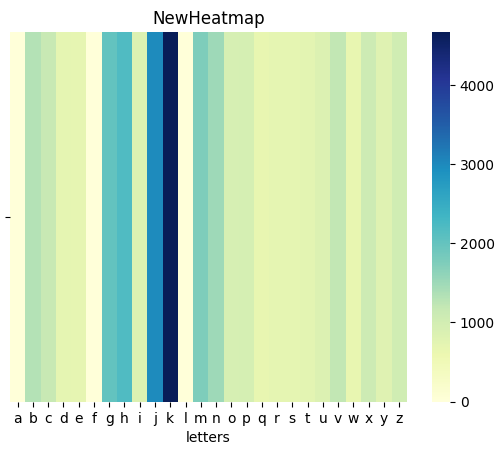

In [13]:
import fitz   #PyMuPDF
from xpinyin import Pinyin  #xpinyin
import numpy as np
import seaborn as sns
from sklearn import preprocessing  #scikit-learn
import operator
import json

file_path = "C:/Users/10094/Desktop/高效均匀的打字编码方法/共产党宣言.pdf"
doc = fitz.open(file_path)
p = Pinyin()
spellDict={} #存储各读音出现的次数
for page in doc:
    text = page.get_text("text")
    for c in text:
        if '\u4e00' <= c <= '\u9fff':
            ch=p.get_pinyin(c,'')
            if ch in spellDict:
                spellDict[ch]+=1
            else :
                spellDict[ch]=1
sortedSpellDict=dict(sorted(spellDict.items(), key=operator.itemgetter(1)))
#重新编码
class Node:
    def __init__(self,key,freq):
        self.key = key #节点的名字
        self.freq = freq
        self.child = {} #节点孩子
        self.code = ''
def create_nodeQ(p_dict):
    Q=[]
    for i in p_dict.keys():
        Q.append(Node(i,p_dict[i]))  
    Q.sort(key=lambda item:item.freq,reverse = True)  #用lambda隐函数实现队列按照字母的概率降序排列      
    return Q 
def addQ(Q, nodeNew):
  if len(Q) == 0:
    return [nodeNew]
  else:
      Q=Q+[nodeNew]
      Q.sort(key=lambda item:item.freq,reverse=True)
      #每次加入节点都需要重新排列成降序
  return Q
class Nodequeue:
    def __init__(self,p_dict):
        self.que = create_nodeQ(p_dict)
        self.size = len(self.que)
        
    def addnode(self,node):
        self.que = addQ(self.que, node)
        self.size += 1
       
    def popNode(self):
        self.size -= 1
        return self.que.pop()
    #加入队列长度要+1，弹出长度-1
def creatHuffmanTree(nodeQ,exact_division):
  if exact_division == True:
      w=0
      for i in range(1,6):
         locals()['node_'+str(i)]=nodeQ.popNode()
         w+=locals()['node_'+str(i)].freq
      r = Node(None,w)
      for i in range(1,6):
        r.child[i] = locals()['node_'+str(i)]
      nodeQ.addnode(r)
  while nodeQ.size != 1:
    w=0
    for i in range(1,24):
       locals()['node_'+str(i)]=nodeQ.popNode()
       w+=locals()['node_'+str(i)].freq
    r = Node(None, w)
    for i in range(1,24):
       r.child[i]=locals()['node_'+str(i)]
    nodeQ.addnode(r)
  return nodeQ.popNode()
  #最后返回的是队列的最后一个节点，也就是概率最大的点，就是这个huffman树的根节点

#由树得到编码表
codeDic1 = {}#编码字典
letterList=['q','w','e','r','s','d','t','y','u','i','o','p','z','x','c','v','b','n','m','g','h','j','k','l']
# 由哈夫曼树得到哈夫曼编码表
def HuffmanCodeDic(roof, x):
  global codeDic, codeList
  if roof:#只要根不为空
    for i in range(1,24):
       if i in roof.child:
          HuffmanCodeDic(roof.child[i],x+letterList[i-1])
    roof.code += x
    if roof.key:
      codeDic1[roof.key] = roof.code

# 字符串编码
def TransEncode(string):
  global codeDic1
  transcode = ""
  for i in string:
    transcode += codeDic1[i]
  return transcode

exact_division=True
t = Nodequeue(sortedSpellDict)
tree = creatHuffmanTree(t,exact_division)
HuffmanCodeDic(tree, '') #从哈夫曼树获取编码
with open("C:/Users/10094/Desktop/高效均匀的打字编码方法/improvedCodeDict.json", "w", encoding='utf-8') as f:
    json.dump(codeDic1,f, indent=2, sort_keys=True)   #保存结果
#用新的编码得到新的拼音字典
newSpellDict={}
#计算新的编码的数据评价
for c in spellDict:
   newSpellDict[codeDic1[c]]=spellDict[c]
newLetterDict={} #获得新的字母使用情况
for i in range(97,123):
    newLetterDict[chr(i)]=0
for ch in newSpellDict:
   for c in ch:
      newLetterDict[c]+=newSpellDict[ch]
print(newLetterDict)
keys=['a','s','d','f','j','k','l']  #一般情况下手指放置的按键
otherKeys=['q','w','e','r','t','y','u','i','o','p','g','h','z','x','c','v','b','n','m']
list1=[]
list2=[]
for c in keys:
    list1.append(newLetterDict[c])
for c in otherKeys:
    list2.append(newLetterDict[c])  #将按键频率分为两个维度进行计算
#计算按键使用均衡性
array1=np.asarray(list1).reshape(-1,1)
array2=np.asarray(list2).reshape(-1,1)
min_max_scaler = preprocessing.MinMaxScaler()
array1_minMax = min_max_scaler.fit_transform(array1)
array2_minMax = min_max_scaler.fit_transform(array2)
s=np.std(array1_minMax)+np.std(array2_minMax) #两个维度的标准差之和作为均衡性的标准
print("按键使用均衡性即标准差为：",s)
typeNum=0 #按键次数
for c in newLetterDict:
   typeNum+=newLetterDict[c]
characterNum=0 #汉字字数
keyNum=0 # qwersd的点击次数
for ch in spellDict:
   characterNum+=spellDict[ch]
typeTime=0 #打字时间
timeDict={} #字母耗时字典
for c in keys:
    timeDict[c]=0.5 #手指位置的按键更容易点击
for c in otherKeys:
    timeDict[c]=0.8 
for c in newLetterDict:
   typeTime+=timeDict[c]*newLetterDict[c]
   if c=='q' or c=='w' or c=='e' or c=='r' or c=='s' or c=='d':
      keyNum+=newLetterDict[c]
print("总按键次数为：",typeNum)
print("汉字总数为：",characterNum)
print("平均单字按键数：",typeNum/characterNum)
print("平均单字耗时：",typeTime/characterNum)
print("qwersd的总使用率:",keyNum/typeNum,"6/24=",6/24)
#绘制热力图
a=[]
for i in range(97,123):
    a.append(newLetterDict[chr(i)])
array = np.asarray(a)
x_ticks = []
for i in range(97,123):
    x_ticks.append(chr(i))
y_ticks = ['']  # 自定义横纵轴
ax = sns.heatmap([array], xticklabels=x_ticks, yticklabels=y_ticks,cmap="YlGnBu")
ax.set_title('NewHeatmap')  # 图标题
ax.set_xlabel('letters')  # x轴标题
ax.set_ylabel('')